## Tugas besar **3**

Downloadlah  <a href="https://drive.google.com/file/d/1gz_t3UHzBzHN8__19-eCs3JewH8n5ohl/view">vgsales.csv</a>

# Soal 1: Baca data vgsales

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


#code di sini
data = pd.read_csv('vgsales.csv')
data.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Expected Output:
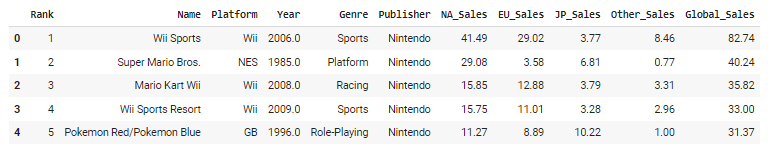

<h2>Soal 2: Preparing Data</h2>

Manipulasikanlah data tersebut dengan menggroupkan berdasarkan Genre, kemudian ambil rata2 penjualan untuk setiap Region Kecuali Global_Sales berdasarkan kategori Genre.

In [52]:
genre = pd.DataFrame(data["Genre"].unique())
genre.sort_values(by=[0], inplace=True)
genre
np.reshape(genre.values, len(genre.values))

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [69]:
import pandas as pd

group = data.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].mean().reindex(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle','Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy'])

group


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.264726,0.158323,0.048236,0.056508
Adventure,0.082271,0.049868,0.040490,0.013072
Fighting,0.263667,0.119481,0.103007,0.043255
Misc,0.235906,0.124198,0.061967,0.043312
Platform,0.504571,0.227573,0.147596,0.058228
Puzzle,0.212680,0.087251,0.098471,0.021564
Racing,0.287766,0.190865,0.045388,0.061865
Role-Playing,0.219946,0.126384,0.236767,0.040060
Shooter,0.444733,0.239137,0.029221,0.078389


In [85]:
#versi pivot tabel
pivot = data.pivot_table(index='Genre', values=['JP_Sales', 'NA_Sales', 'EU_Sales', 'Other_Sales'], aggfunc='mean')
pivot
pivot_sort = pivot.reindex(columns=["NA_Sales","EU_Sales","JP_Sales","Other_Sales"])
pivot_sort

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.264726,0.158323,0.048236,0.056508
Adventure,0.082271,0.049868,0.040490,0.013072
Fighting,0.263667,0.119481,0.103007,0.043255
Misc,0.235906,0.124198,0.061967,0.043312
Platform,0.504571,0.227573,0.147596,0.058228
Puzzle,0.212680,0.087251,0.098471,0.021564
Racing,0.287766,0.190865,0.045388,0.061865
Role-Playing,0.219946,0.126384,0.236767,0.040060
Shooter,0.444733,0.239137,0.029221,0.078389


Expected Output:

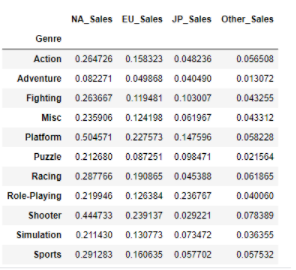

Soal 3: Tranformasikan data tersebut,dengan harapan saat divisualisasi  NA_Sales,EU_Sales,JP_Sales dan Other_Sales ada di sumbu-x

In [161]:
#code di sini
gt = group.transpose()
gt

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,0.264726,0.082271,0.263667,0.235906,0.504571,0.212680,0.287766,0.219946,0.444733,0.211430,0.291283,0.100881
EU_Sales,0.158323,0.049868,0.119481,0.124198,0.227573,0.087251,0.190865,0.126384,0.239137,0.130773,0.160635,0.066579
JP_Sales,0.048236,0.040490,0.103007,0.061967,0.147596,0.098471,0.045388,0.236767,0.029221,0.073472,0.057702,0.072628
Other_Sales,0.056508,0.013072,0.043255,0.043312,0.058228,0.021564,0.061865,0.040060,0.078389,0.036355,0.057532,0.016681


Expected Output:

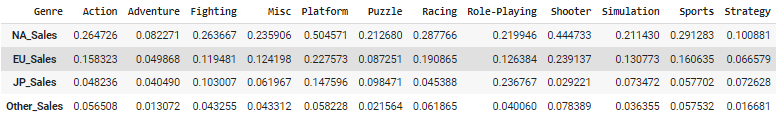

---

<h2>Soal 4: Perbandingan Kuantitatif Barplot - Grouping Visualisasi Dengan Barplot</h2>
1. Visualisasikan gambar yang tadi kamu manipulasi, untuk mengjasilkan visualisasi seperti di bawah ini
2. Tuliskan kesimpulan yang didapat dari visualisasi tersebut

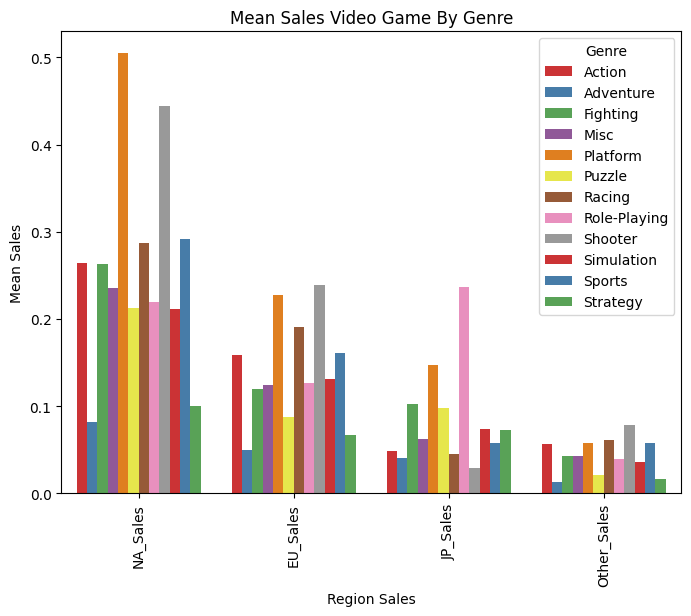

In [152]:
#code di sini
plt.figure(figsize=(8,6))
melted_group = pd.melt(group.reset_index(), id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Region Sales', value_name='Mean Sales')

sns.barplot(data=melted_group, x='Region Sales', y='Mean Sales', hue='Genre', palette="Set1")
plt.title("Mean Sales Video Game By Genre")
plt.xticks(rotation=90)
plt.show()

Expected Output(abaikan warna pada grafik):
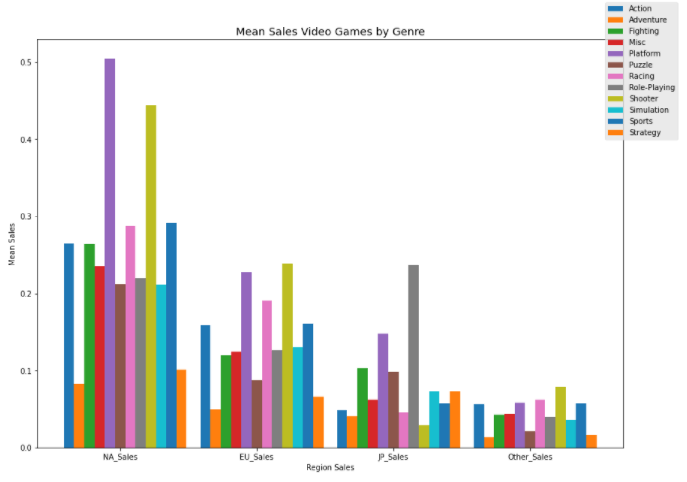


*Kesimpulan*: Penjualana pada Region NA/Amerika Utara adalah Region atau wilayah penjualan tertinggi secara rata-rata dibandingkan di regional lain untuk setiap kategori. Sedangkan untuk wilayah penjualan tertignggi kedua ditempati oleh penjualan di Region/wilayah Eropa (EU) dan diikuti oleh Jepang (JP)

---

<h2>Soal 5: Perbandingan Kuantitatif Barplot - Stack Barplot</h2>

1. Visualisasikan gambar yang tadi kamu manipulasi, untuk mengjasilkan visualisasi seperti di bawah ini
2. Tuliskan kesimpulan yang didapat dari visualisasi tersebut

In [169]:
gt.columns

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object', name='Genre')

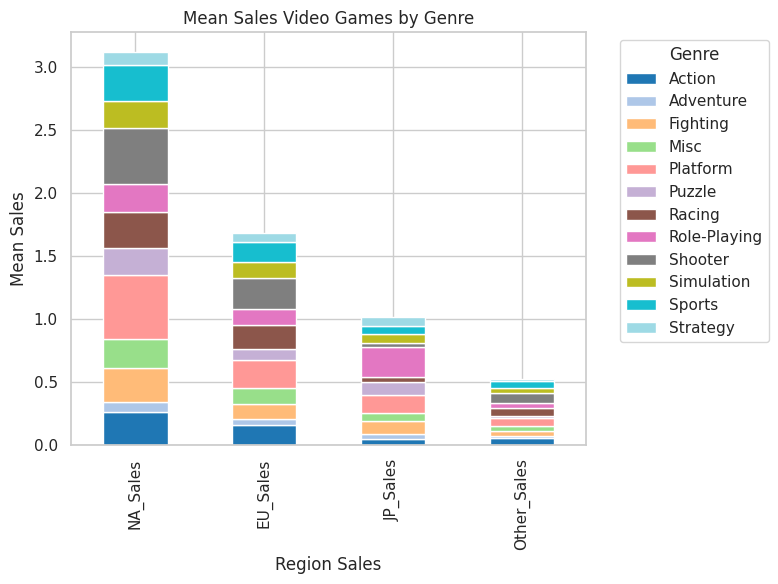

In [176]:
#code disini
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plot
ax = gt.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20')
plt.title('Mean Sales Video Games by Genre')
plt.xlabel('Region Sales')
plt.ylabel('Mean Sales')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Expected Output:

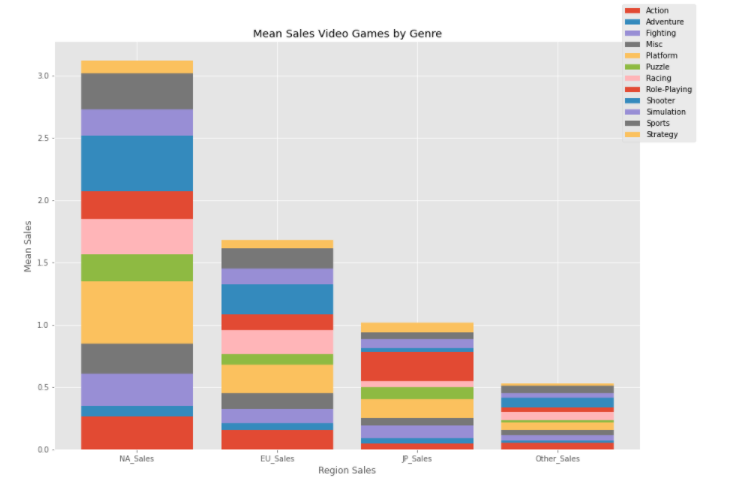

Kesimpulan : Pada Jenis Grafik Stackbar, dapat terlihat semakin jelas bahwa penjualan regional NA adalah yang terbesar sedangkan penjualan di regional lain (Other Sales) adalah yang terkecil. Untuk Genre yang paling banyak terjual di wilayah Amerika utara adalah yang bergenre Platform, sedangkan di Regional Eropa adala genre "Shooter" sedangkan untuk Regional Jepang adalah "Role Playing" Sementara untuk wilayah lain atau Other Regional adalah yang bergenre "Shooter"